In [1]:
!pip install pyomo
!wget https://people.montefiore.uliege.be/cornelusse/utils/ampl.linux-intel64.zip
!unzip /content/ampl.linux-intel64.zip
!chmod +x /content/ampl.linux-intel64/ipopt # To make sure it can be executed
!chmod +x /content/ampl.linux-intel64/cbc # To make sure it can be executed

--2025-08-08 08:13:22--  https://people.montefiore.uliege.be/cornelusse/utils/ampl.linux-intel64.zip
Resolving people.montefiore.uliege.be (people.montefiore.uliege.be)... 139.165.57.148
Connecting to people.montefiore.uliege.be (people.montefiore.uliege.be)|139.165.57.148|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17486900 (17M) [application/zip]
Saving to: ‘ampl.linux-intel64.zip’

ampl.linux-intel64. 100%[===================>]  16.68M  8.01MB/s    in 2.1s    

2025-08-08 08:13:25 (8.01 MB/s) - ‘ampl.linux-intel64.zip’ saved [17486900/17486900]

Archive:  /content/ampl.linux-intel64.zip
   creating: ampl.linux-intel64/
  inflating: __MACOSX/._ampl.linux-intel64  
  inflating: ampl.linux-intel64/.DS_Store  
  inflating: __MACOSX/ampl.linux-intel64/._.DS_Store  
  inflating: ampl.linux-intel64/libOsiClp.so.1  
  inflating: __MACOSX/ampl.linux-intel64/._libOsiClp.so.1  
  inflating: ampl.linux-intel64/metadata.json  
  inflating: __MACOSX/ampl.linux-intel6

In [2]:
!pip install pandapower --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 8.3 MB/s eta 0:00:00


In [3]:
!pip install networkx

In [4]:
!pip install gurobipy  # install gurobipy, if not already installed

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 72.3 MB/s eta 0:00:00


In [5]:
import gurobipy as gp
import time
import pandas as pd
import xarray as xr
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from dataclasses import dataclass
import pyomo.environ as pyo
import math
import pandapower as pp


# Create a new graph
G = nx.DiGraph()

In [6]:
def create_network():

    import pandapower as pp

# Crée le réseau
    net = pp.create_empty_network()

# Bases
    Pbase = 100  # MVA
    Vbase_high = 110  # kV
    Vbase_medium = 20  # kV
    Vbase_low = 0.4  # kV

# Buses
    b0 = pp.create_bus(net, vn_kv=Vbase_high, name="Bus grid", geodata=(0,10))
    b1 = pp.create_bus(net, vn_kv=Vbase_high, name="DSO 1", geodata=(5,12))
    b2 = pp.create_bus(net, vn_kv=Vbase_high, name="DSO 2", geodata=(5,8))
    b3 = pp.create_bus(net, vn_kv=Vbase_medium, name="Bus MV_1", geodata=(10,12))
    b4 = pp.create_bus(net, vn_kv=Vbase_medium, name="Bus MV_2", geodata=(10,8))
    b5 = pp.create_bus(net, vn_kv=Vbase_low, name="Bus LV_1", geodata=(15,12))
    b6 = pp.create_bus(net, vn_kv=Vbase_low, name="Bus LV_2", geodata=(15,8))
    b7 = pp.create_bus(net, vn_kv=Vbase_medium, name="Bus éolien", geodata=(10,14))
    b8 = pp.create_bus(net, vn_kv=Vbase_medium, name="Bus industriel", geodata=(10,10))
    b9 = pp.create_bus(net, vn_kv=Vbase_low, name="Bus load", geodata=(15,14))
    b10 = pp.create_bus(net, vn_kv=Vbase_low, name="Bus PV", geodata=(15,10))
    b11 = pp.create_bus(net, vn_kv=Vbase_high, name="TSO 1", geodata=(2,12))
    b12 = pp.create_bus(net, vn_kv=Vbase_high, name="TSO 2", geodata=(2,8))

# Lignes
    pp.create_line(net, b0, b1, length_km=12, std_type='149-AL1/24-ST1A 110.0', name="line1")
    pp.create_line(net, b1, b2, length_km=10, std_type='149-AL1/24-ST1A 110.0', name="line2")
    pp.create_line(net, b0, b2, length_km=10, std_type='149-AL1/24-ST1A 110.0', name="line3")
    pp.create_line(net, b3, b7, length_km=0.23, std_type='NA2XS2Y 1x185 RM/25 12/20 kV', name="line4")
    pp.create_line(net, b4, b8, length_km=0.3, std_type='NA2XS2Y 1x185 RM/25 12/20 kV', name="line5")
    pp.create_line(net, b5, b9, length_km=3, std_type='94-AL1/15-ST1A 0.4', name="line6")
    pp.create_line(net, b6, b10, length_km=0.45, std_type='94-AL1/15-ST1A 0.4', name="line7")
    pp.create_line(net, b0, b11, length_km=16, std_type='149-AL1/24-ST1A 110.0', name= 'line8')
    pp.create_line(net, b11, b1, length_km=24, std_type='149-AL1/24-ST1A 110.0', name= 'line9')
    pp.create_line(net, b0, b12, length_km=22, std_type='149-AL1/24-ST1A 110.0', name= 'line10')
    pp.create_line(net, b12, b2, length_km=16, std_type='149-AL1/24-ST1A 110.0', name= 'line11')

# Transformateurs
    pp.create_transformer(net, b1, b3, std_type="25 MVA 110/20 kV", name="TR_1")
    pp.create_transformer(net, b2, b4, std_type="25 MVA 110/20 kV", name="TR_2")
    pp.create_transformer(net, b3, b5, std_type="0.4 MVA 20/0.4 kV", name="TR_3")
    pp.create_transformer(net, b4, b6, std_type="0.4 MVA 20/0.4 kV", name="TR_4")

# Éléments de bus
    pp.create_ext_grid(net, bus=b0, vm_pu=1.00, name="Grid Connection")
    pp.create_load(net, bus=b9, p_mw=0.02, q_mvar=0.02, name="Residential Load")
    pp.create_gen(net, bus=b10, p_mw=0.2, vm_pu=1.00, name="PV", max_q_mvar=200, min_q_mvar=0, max_p_mw=300, min_p_mw=0, controllable=False)
    pp.create_gen(net, bus=b7, p_mw=6.5, vm_pu=1.0, name="Wind Turbine", controllable=False)
    pp.create_load(net, bus=b8, p_mw=6, q_mvar=1.8, name="Industry")
    pp.create_load(net, bus=b11, p_mw=20, q_mvar=9, name="Datacenter")
    pp.create_load(net, bus=b12, p_mw=50, q_mvar=24, name="Big industry")

# Donner accès à net
    return net

In [121]:
def create_digraph():
  net = create_network()

  import json
  import networkx as nx
  import matplotlib.pyplot as plt
# 1. Conversion du réseau Pandapower en DiGraph
# ================================
  G = nx.DiGraph()

# Créer les positions à partir de la colonne "geo"
  pos = {}
  for idx, row in net.bus.iterrows():
  # Extraire le champ 'geo' qui est une chaîne de caractères représentant un dictionnaire JSON
      geo_data = row['geo']

  # Convertir la chaîne JSON en un dictionnaire Python
      geo_dict = json.loads(geo_data)

  # Extraire la liste des coordonnées
      coordinates = geo_dict["coordinates"]

  # Ajouter les coordonnées dans le dictionnaire pos
      pos[idx] = tuple(coordinates)  # Assigner les coordonnées sous forme de tuple

# Ajouter les nœuds (avec le nom comme label) and voltage
  for idx, row in net.bus.iterrows():
      G.add_node(idx, label=row["name"], pos=pos[idx], vn_kv=row["vn_kv"])


# Ajouter les arêtes pour les lines
  for _, row in net.line.iterrows():
      G.add_edge(row["from_bus"], row["to_bus"], type="line", name=row["name"], length=row["length_km"])

# Ajouter les arêtes pour les transformateurs
  for _, row in net.trafo.iterrows():
      G.add_edge(row["hv_bus"], row["lv_bus"], type="trafo", name=row["name"])

# Ajouter les générateurs et les charges comme attributs aux nœuds
  for _, row in net.gen.iterrows():
      G.nodes[row["bus"]]["type"] = "gen"
      G.nodes[row["bus"]]["gen_name"] = row["name"]
      G.nodes[row["bus"]]["gen_power"] = row["p_mw"]

  for _, row in net.load.iterrows():
      G.nodes[row["bus"]]["type"] = "load"
      G.nodes[row["bus"]]["load_name"] = row["name"]
      G.nodes[row["bus"]]["load_power"] = row["p_mw"]

  for _, row in net.ext_grid.iterrows():
      G.nodes[row["bus"]]["type"] = "ext_grid"
      G.nodes[row["bus"]]["grid_name"] = row["name"]

# 2. Ajout des puissances consommées et injectées aux nœuds
# ================================
  nx.set_node_attributes(G, 0.0, "P_load")
  nx.set_node_attributes(G, 0.0, "P_gen")

# Charges
  for _, row in net.load.iterrows():
      G.nodes[row["bus"]]["P_load"] += row["p_mw"]
      print(row)

# Générateurs
  for _, row in net.gen.iterrows():
      G.nodes[row["bus"]]["P_gen"] += row["p_mw"]

# Source externe
  for _, row in net.ext_grid.iterrows():
      G.nodes[row["bus"]]["P_gen"] += 0  # grande valeur symbolique

# Calculate P_net
  for n in G.nodes:
      G.nodes[n]["P_net"] = G.nodes[n]["P_gen"] - G.nodes[n]["P_load"]

# Create subnetworks (NetworkX DiGraphs) from the main graph G
  network1_buses = [0, 1, 2, 11,12]
  network2_buses = [3, 7, 5, 9, 10]
  network3_buses = [4, 8, 6]

# Assign G1 to G and then add power attributes to nodes in G
  #G = G.subgraph(network1_buses)

  for n in G.nodes:
      G.nodes[n]["P"] = G.nodes[n]["P_net"] # Assign P_net to 'P' attribute

# 3. Préparer les couleurs des nœuds en fonction de P_net
# ================================
  node_colors = []
  for n, data in G.nodes(data=True):
      if data["P_net"] > 0:
          node_colors.append("green")   # producteur
      elif data["P_net"] < 0:
          node_colors.append("red")     # consommateur
      else:
          node_colors.append("gray")    # neutre

# 4. Préparer les labels : Nom + P_net
# ================================
  labels = {n: f"{data['label']}\nP={round(data['P_net'],2)}MW"
            for n, data in G.nodes(data=True)}

# 5. Function to plot the network
# ================================
  def plot_network():
      pos = nx.get_node_attributes(G, 'pos')

      plt.figure(figsize=(12, 8))
      nx.draw(
          G, pos,
          with_labels=True, labels=labels,
          node_size=1200, node_color=node_colors,
          edgecolors="black", font_size=8,
          alpha=0.85
          )

  # Labels des arêtes (type ligne ou trafo)
      edge_labels = nx.get_edge_attributes(G, 'type')
      nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)

      plt.title("Réseau électrique avec puissances (P_net)")
      plt.axis("equal")
      plt.show()


  return G, plot_network()

name               Residential Load
bus                               9
p_mw                           0.02
q_mvar                         0.02
const_z_percent                 0.0
const_i_percent                 0.0
sn_mva                          NaN
scaling                         1.0
in_service                     True
type                            wye
Name: 0, dtype: object
name               Industry
bus                       8
p_mw                    6.0
q_mvar                  1.8
const_z_percent         0.0
const_i_percent         0.0
sn_mva                  NaN
scaling                 1.0
in_service             True
type                    wye
Name: 1, dtype: object
name               Datacenter
bus                        11
p_mw                     20.0
q_mvar                    9.0
const_z_percent           0.0
const_i_percent           0.0
sn_mva                    NaN
scaling                   1.0
in_service               True
type                      wye
Name: 2, dtype

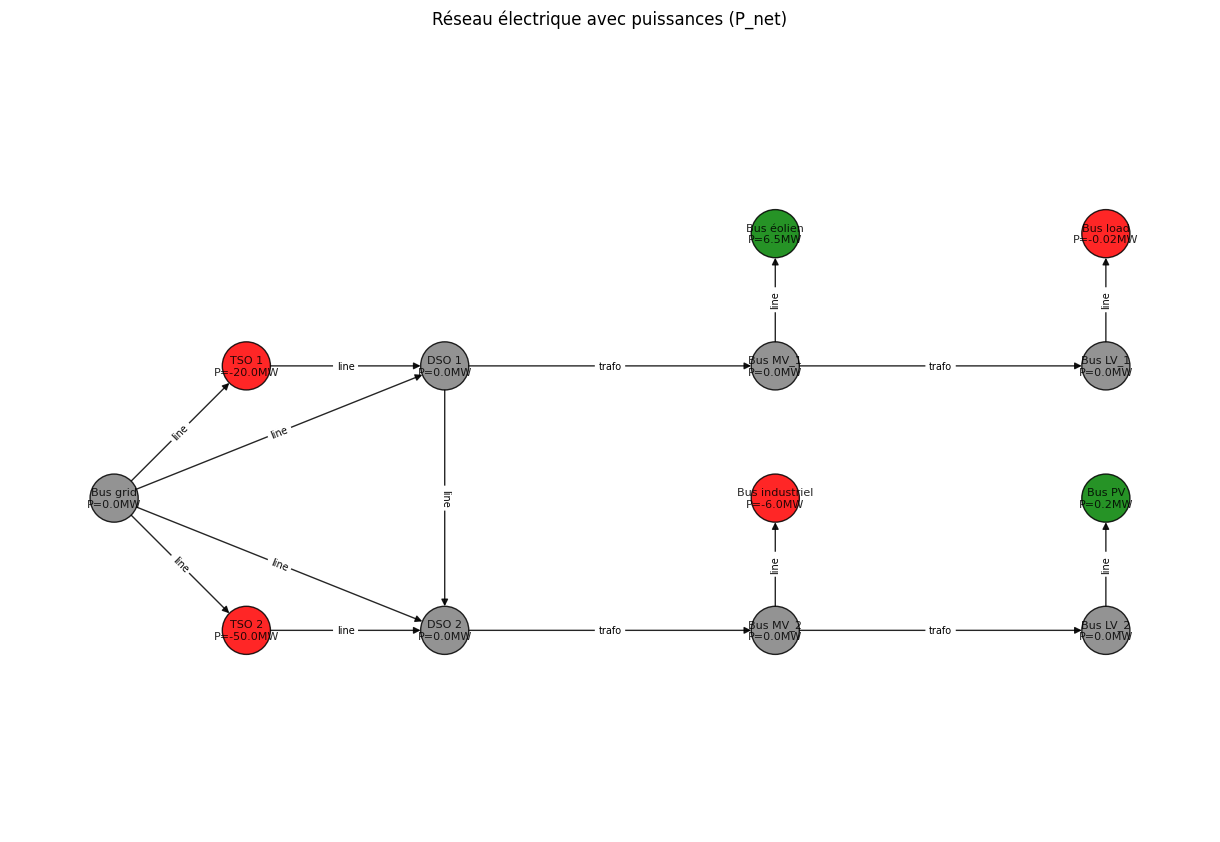

Value of G.nodes[11]['P'] after updating G: -20.0


In [145]:
G, plot_func = create_digraph()
print(f"Value of G.nodes[11]['P'] after updating G: {G.nodes[11]['P']}")

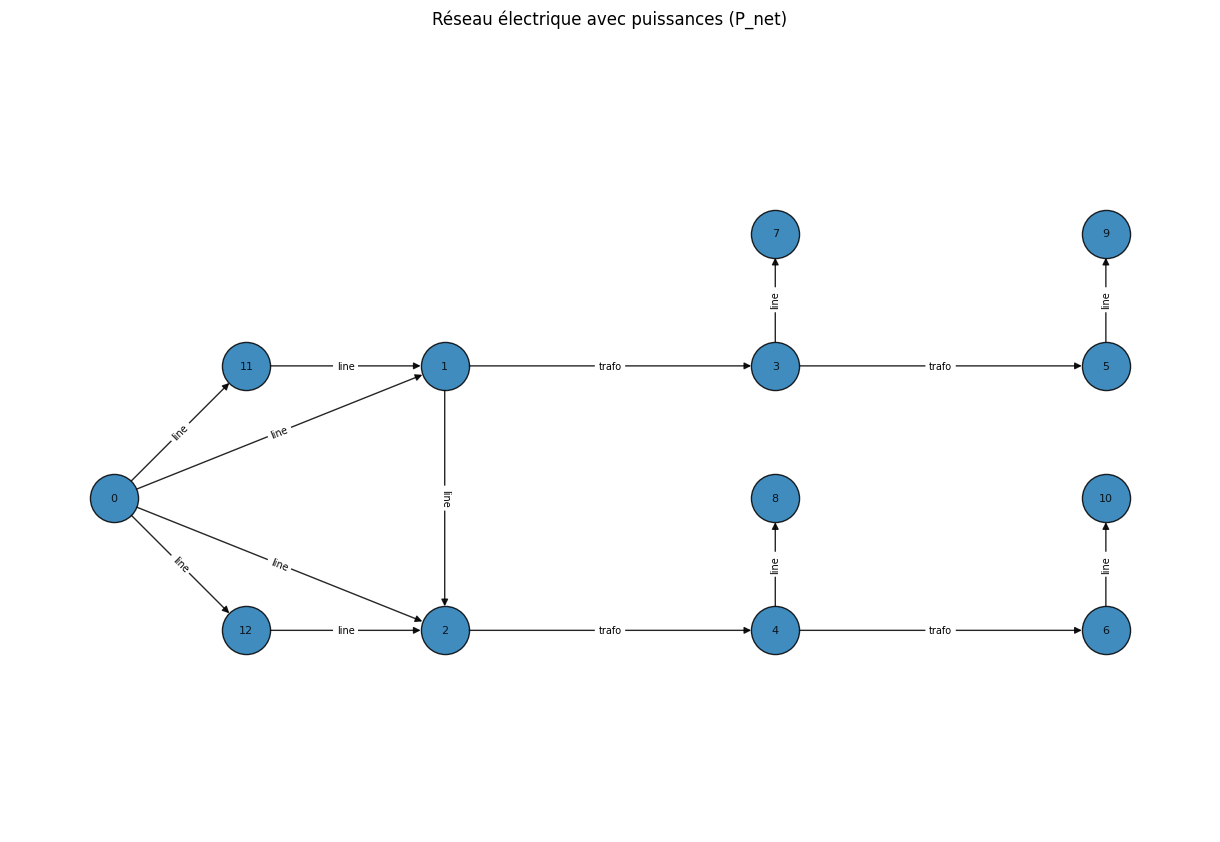

In [146]:
def plot_network(G):
      pos = nx.get_node_attributes(G, 'pos')

      plt.figure(figsize=(12, 8))
      nx.draw(
          G, pos,
          with_labels=True,
          node_size=1200,
          edgecolors="black", font_size=8,
          alpha=0.85
          )

  # Labels des arêtes (type ligne ou trafo)
      edge_labels = nx.get_edge_attributes(G, 'type')
      nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)

      plt.title("Réseau électrique avec puissances (P_net)")
      plt.axis("equal")
      plt.show()

plot_network(G)

In [182]:

# Define base values for the per-unit system
s_base = 100  # MVA
v_base_high = 110 # kV (From the create_network function)

print(G.nodes[11]['P'])
print(f"Base Power (S_base): {s_base} MVA")
print(f"Base Voltage (V_base_high): {v_base_high} kV")

-20.0
Base Power (S_base): 100 MVA
Base Voltage (V_base_high): 110 kV


In [177]:
def length (i, j):
    xi, yi = G.nodes[i]['pos']
    xj, yj = G.nodes[j]['pos']
    return (math.hypot(xi - xj, yi - yj))*10/1000  # distance euclidienne, *10/1000 (pixel/km)
length(0, 1)

0.053851648071345036

In [178]:
#Calculate the susceptance of each line in Siemens per km
for u, v in G.edges():
    G[u][v]['b'] = length(u,v)* 200*10**-6

print(G[u-1][v-1]['b'])

6e-06


In [179]:
#Constant definition
V_min = 0
V_max = 100

I_min = -50
I_max = 50


P_min = -1000
P_max = 1000

theta_min = -200
theta_max = 200


alpha = 1000


In [180]:
def get_node_voltage_kv(node_index):
  """
  Returns the voltage (vn_kv) for a given node index from the graph.

  Args:
    node_index: The index of the node in the graph.

  Returns:
    The voltage in kV for the specified node.
  """
  # Assuming 'G' is the NetworkX DiGraph object created earlier
  # Access the 'vn_kv' attribute for the given node_index
  return G.nodes[node_index]['vn_kv']

# Example usage:
# To get the voltage for node 0:
# voltage_node_0 = get_node_voltage_kv(0)
# print(f"Voltage at node 0: {voltage_node_0} kV")

# To get the voltage for node 3:
voltage_node_3 = get_node_voltage_kv(0)
print(f"Voltage at node 3: {voltage_node_3} kV")

Voltage at node 3: 110.0 kV


In [183]:
m = pyo.ConcreteModel()
# Define base values for the per-unit system
s_base = 100  # MVA
v_base_high = 110 # kV (From the create_network function)

print(f"Base Power (S_base): {s_base} MVA")
print(f"Base Voltage (V_base_high): {v_base_high} kV")

m.Nodes = pyo.Set(initialize= [b for b in G.nodes])
m.Lines = pyo.Set(initialize= [l for l in G.edges])
m.i = pyo.Set(initialize=[0, 1]) # Initialize m.i with two generic elements
m.j = pyo.Set(initialize= [0, 1])
m.children = pyo.Set(initialize= [1, 2])
m.parents = pyo.Set(initialize = [0])

m.P = pyo.Param(m.Nodes, initialize = {n: G.nodes[n].get('P') for n in G.nodes}, domain = pyo.Reals, mutable=True) # Make P mutable


# Variables principales
m.F = pyo.Var(m.Lines, m.i, m.j, domain=pyo.Reals)     # active power flow through lines
m.I = pyo.Var(m.Lines,  m.i, m.j, domain=pyo.Reals)  # current flowing through lines
m.theta = pyo.Var(m.Nodes,  m.i, m.j, domain=pyo.Reals)  # phase angle of the voltage
m.V = pyo.Var(m.Nodes, m.i, m.j, domain=pyo.NonNegativeReals)  # voltage magnitude at each node
m.E = pyo.Var(m.Nodes, m.i, m.j, domain=pyo.Reals) #net power injection/consumption
m.P_plus = pyo.Var(m.parents, m.i, m.j, domain=pyo.Reals) #power entering the operational graph
m.P_minus = pyo.Var(m.children, m.i, m.j, domain=pyo.Reals) #power leaving the operational graph

m.P_C_set = pyo.Var(m.children, m.i, domain=pyo.Reals) #vertices of the power envelope at each child node

#m.P_C_min = pyo.Var(m.children, m.i, m.j, domain=pyo.Reals)
#m.P_C_max = pyo.Var(m.children, m.i, m.j,  domain=pyo.Reals)

m.V_P = pyo.Param(m.j, initialize = {0: 0.9, 1: 1.1}, domain =pyo.NonNegativeReals)

m.O = pyo.Var(domain= pyo.NonNegativeReals)

for u in G.nodes():
  if G.nodes[u].get('P', 0.0) / s_base == 0:
    m.P[u] = 0.001
  else:
    G.nodes[u]['P_pu'] = G.nodes[u].get('P', 0.0) / s_base
    m.P[u] = - G.nodes[u]['P_pu']

"""# Convert P parameter to per-unit
for n in G.nodes:
    # Assuming P is in MW, convert to per-unit
    G.nodes[n]['P'] = G.nodes[n].get('P', 0.0) / s_base
    m.P[n] = G.nodes[n]['P']"""


# Convert susceptance 'b' on edges to per-unit
for u, v in G.edges():
    # Assuming 'b' is in Siemens/km, convert to per-unit
    # b_pu = b_actual * (V_base^2 / S_base)
    # V_base is assumed to be v_base_high (110 kV)
    G[u][v]['b_pu'] = G[u][v].get('b', 0.0) * (get_node_voltage_kv(u)**2 / s_base)
print(m.P[11].value)
print("Converted power values (P) in G and m.P to per-unit.")
print("Converted susceptance values (b) in G edges to per-unit.")
print("Voltage and Current bounds assumed to be already in per-unit.")

Base Power (S_base): 100 MVA
Base Voltage (V_base_high): 110 kV
0.2
Converted power values (P) in G and m.P to per-unit.
Converted susceptance values (b) in G edges to per-unit.
Voltage and Current bounds assumed to be already in per-unit.


In [184]:
for n in G.nodes:
  print(m.P[n].value)
m.P[1].value


0.001
0.001
0.001
0.001
0.001
0.001
0.001
-0.065
0.06
0.0002
-0.002
0.2
0.5


0.001

In [185]:
# Auxiliary variable for the absolute value of E (already defined as per-unit)
m.z = pyo.Var(m.Nodes, m.i, m.j, domain=pyo.NonNegativeReals)

m.curt = pyo.Var(m.Nodes, m.i, m.j, domain=pyo.Reals)

def curtailment_def_rule(m,n, vert_pow, vert_volt):

  return m.curt[n, vert_pow, vert_volt] == m.P[n] - m.E[n, vert_pow, vert_volt]

m.curt_def = pyo.Constraint(m.Nodes, m.i, m.j, rule=curtailment_def_rule)
# Constraints to define the absolute value (already defined for per-unit E)
def abs_E_pos_rule(m, n, vert_pow, vert_volt):
    return m.z[n, vert_pow, vert_volt] >= m.curt[n, vert_pow, vert_volt]
m.abs_E_pos = pyo.Constraint(m.Nodes, m.i, m.j, rule=abs_E_pos_rule)

def abs_E_neg_rule(m, n, vert_pow, vert_volt):
    return m.z[n, vert_pow, vert_volt] >= -m.curt[n, vert_pow, vert_volt]
m.abs_E_neg = pyo.Constraint(m.Nodes, m.i, m.j, rule=abs_E_neg_rule)

def upper_bound_rule(m, vert_pow, vert_volt):
    # m.z is per-unit, m.O is per-unit
    return sum(m.z[n, vert_pow, vert_volt] for n in m.Nodes) <= m.O

m.upper_bound = pyo.Constraint(m.i, m.j, rule=upper_bound_rule)

# Current magnitude constraint (I_min, I_max are assumed per-unit)
def current_bounds_rule(m, i, j, vert_pow, vert_volt):
    # m.I is per-unit current
    return pyo.inequality(I_min, m.I[i,j, vert_pow, vert_volt], I_max)
m.CurrentBounds = pyo.Constraint(m.Lines, m.i, m.j, rule=current_bounds_rule)



def dc_power_flow_rule(m, i, j, vert_pow, vert_volt):
    return m.F[i, j, vert_pow, vert_volt] == - G[i][j]['b_pu'] * (
        m.theta[i, vert_pow, vert_volt] - m.theta[j, vert_pow, vert_volt]
    )

m.DCFlow = pyo.Constraint(m.Lines, m.i, m.j, rule=dc_power_flow_rule)


def current_def_rule(m, n, i, j, vert_pow, vert_volt):
    # This constraint relates per-unit current, per-unit voltage, and per-unit power flow.
    # In per-unit, P_pu = V_pu * I_pu. This is correct.
    return m.I[i,j, vert_pow, vert_volt] * 1 == m.F[i,j, vert_pow, vert_volt]

m.current_def = pyo.Constraint(m.Nodes, m.Lines, m.i, m.j, rule=current_def_rule)



def nodes_balance(m, n, vert_pow, vert_volt):
    inflow = sum(m.F[k, n, vert_pow, vert_volt] for k in G.predecessors(n) if (k, n) in m.Lines)
    outflow = sum(m.F[n, j, vert_pow, vert_volt] for j in G.successors(n) if (n, j) in m.Lines)
    if n in m.parents:
      return inflow - outflow - m.P_plus[n, vert_pow, vert_volt] ==  m.E[n, vert_pow, vert_volt]


    else:
      return inflow - outflow ==  m.E[n,vert_pow,vert_volt]

m.nodes_balance = pyo.Constraint(m.Nodes, m.i, m.j, rule=nodes_balance)


def parent_power_constraint_rule(m, parent, vert_pow, vert_volt):
    # m.P_plus is per-unit power entering the operational graph
    return pyo.inequality(P_min, m.P_plus[parent, vert_pow, vert_volt], P_max)

m.parent_power_constraint = pyo.Constraint(m.parents, m.i, m.j, rule=parent_power_constraint_rule)



def objective_rule(m):
  #somme = 0
  #somme = sum(m.t[child, i] for child in m.children for i in m.i)
  somme = 0
  somme = sum(m.P_plus[parent, i, j] for parent in m.parents for i in m.i for j in m.j)
  return  - alpha * m.O + somme

m.objective = pyo.Objective(rule=objective_rule, sense=pyo.maximize)

In [186]:
# Résolution
# -------------------------
# Create an environment with your WLS license
params = {
    "WLSACCESSID": 'efa10779-150a-495c-ab62-6a20ff44c598',
    "WLSSECRET": 'fa980d94-a6fd-4d7b-aa68-b0e19ddd2e84',
    "LICENSEID": 2651433,
}
env = gp.Env(params=params)
solver = pyo.SolverFactory('gurobi', env= env)

# Solve the model
results = solver.solve(m, tee=True)

# Check the termination condition
if results.solver.termination_condition == pyo.TerminationCondition.infeasible:
    print("The model is infeasible.")
elif results.solver.termination_condition == pyo.TerminationCondition.unbounded:
    print("The model is unbounded.")
elif results.solver.termination_condition == pyo.TerminationCondition.infeasibleOrUnbounded:
    print("The model is infeasible or unbounded.")
else:
    print("Solver terminated with condition:", results.solver.termination_condition)
    # Print the results (optional, but good practice)
    print(results)

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2651433
Academic license 2651433 - for non-commercial use only - registered to an___@student.uliege.be
Read LP format model from file /tmp/tmp6y4ot065.pyomo.lp
Reading time = 0.00 seconds
x1: 1180 rows, 333 columns, 2412 nonzeros
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: AMD EPYC 7B12, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 1180 rows, 333 columns and 2412 nonzeros
Model fingerprint: 0xb5cf2f1a
Coefficient statistics:
  Matrix range     [6e-09, 1e+00]
  Objective range  [1e+00, 1e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-04, 1e+03]
Presolve removed 1060 rows and 216 columns
Presolve time: 0.00s
Presolved: 120 rows, 117 columns, 444 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.0000000e+03   7.414064e+02

In [187]:
print(m.E[0,0,0].value)
print(m.E[0,0,1].value)

print(m.E[11,0,0].value)
print(m.E[11,0,1].value)

print(m.E[12,0,0].value)
print(m.E[12,0,1].value)

0.001
0.001
0.2
0.2
0.5
0.5


In [188]:
print(m.F[0,11,0,0].value)
print(m.F[0,11,0,1].value)

0.1217125574976038
0.1217125574976038


In [189]:
print(m.theta[0,0,0].value)
print(m.theta[0,0,1].value)

print(m.theta[11,0,0].value)
print(m.theta[11,0,1].value)

0.0
0.0
177.81771645064714
177.81771645064714


In [190]:

m.O.value


0.0

In [173]:
m.P[0].value

0.001

In [191]:
m.P_plus[0,0,1].value

-0.7002

In [118]:
for (u,v) in m.Lines:
  print((u,v))

(0, 1)
(0, 2)
(0, 11)
(0, 12)
(1, 2)
(11, 1)
(12, 2)


In [193]:
# Corrected loop structure to iterate over m.Lines
for (u, v) in m.Lines:
  for vert_pow in m.i:
    for vert_volt in m.j:
      if m.F[u, v, vert_pow, vert_volt].value != 0.0:
        print(f"Flow on line ({u}, {v}) for i={vert_pow}, j={vert_volt}: {m.F[u, v, vert_pow, vert_volt].value}")

# Access a specific flow value using correct indexing
if m.F[5, 9, 0, 0].value is not None:
    print(f"Flow on line (5, 9) for i=0, j=0: {m.F[0, 2, 0, 0].value}")
else:
    print("Flow on line (0, 2) for i=0, j=0 is None.")

if m.F[11, 1, 0, 0].value is not None:
    print(f"Flow on line (11, 1) for i=0, j=0: {m.F[0, 2, 0, 0].value}")
else:
    print("Flow on line (11, 1) for i=0, j=0 is None.")

print(G.nodes[11]['P_pu'])

Flow on line (0, 1) for i=0, j=0: 0.09120354544088473
Flow on line (0, 1) for i=0, j=1: 0.09120354544088473
Flow on line (0, 1) for i=1, j=0: 0.09120354544088473
Flow on line (0, 1) for i=1, j=1: 0.09120354544088473
Flow on line (0, 2) for i=0, j=0: 0.1917931774585315
Flow on line (0, 2) for i=0, j=1: 0.1917931774585315
Flow on line (0, 2) for i=1, j=0: 0.1917931774585315
Flow on line (0, 2) for i=1, j=1: 0.1917931774585315
Flow on line (0, 11) for i=0, j=0: 0.1217125574976038
Flow on line (0, 11) for i=0, j=1: 0.1217125574976038
Flow on line (0, 11) for i=1, j=0: 0.1217125574976038
Flow on line (0, 11) for i=1, j=1: 0.1217125574976038
Flow on line (0, 12) for i=0, j=0: 0.29449071960298
Flow on line (0, 12) for i=0, j=1: 0.29449071960298
Flow on line (0, 12) for i=1, j=0: 0.29449071960298
Flow on line (0, 12) for i=1, j=1: 0.29449071960298
Flow on line (1, 2) for i=0, j=0: 0.07471610293848849
Flow on line (1, 2) for i=0, j=1: 0.07471610293848849
Flow on line (1, 2) for i=1, j=0: 0.0747

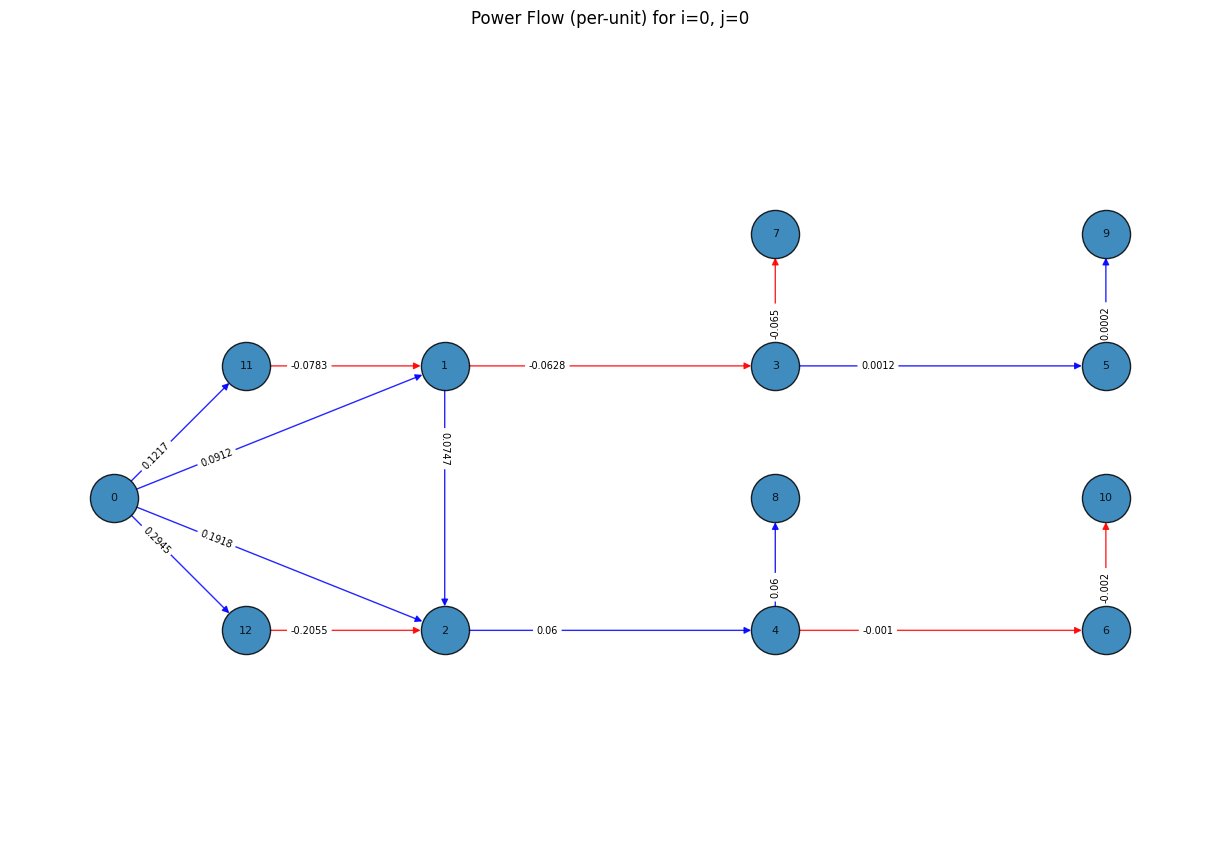

In [192]:
def plot_power_flow(m, i, j):
    pos = nx.get_node_attributes(G, 'pos')
    # Use node indices as labels
    labels = {n: n for n in G.nodes()}

    plt.figure(figsize=(12, 8))

    edge_colors = []
    edge_labels = {}

    for u, v in G.edges():
        try:
            # Correct the sign of the flow value for plotting
            flow_value = m.F[u, v, i, j].value
            if flow_value is not None:
                edge_labels[(u, v)] = f"{round(flow_value, 4)}"
                if flow_value > 0:
                    edge_colors.append('blue')  # Positive flow (now correctly represents flow from u to v)
                elif flow_value < 0:
                    edge_colors.append('red')  # Negative (reverse) flow (now correctly represents flow from v to u)
                else:
                    edge_colors.append('gray') # No flow
            else:
                edge_colors.append('gray') # No flow value
        except:
            edge_colors.append('gray') # Handle cases where edge might not be in m.F

    nx.draw(
        G, pos,
        with_labels=True, labels=labels, # Set with_labels to True and pass node indices as labels
        node_size=1200,
        edge_color=edge_colors, # Use the calculated edge colors
        edgecolors="black", font_size=8,
        alpha=0.85
    )

    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7, label_pos=0.3)

    plt.title(f"Power Flow (per-unit) for i={i}, j={j}")
    plt.axis("equal")
    plt.show()

# Example usage (assuming m, i=0, and j=0 are defined)
plot_power_flow(m, 0, 0)